In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [2]:
df = pd.read_csv('../data/house_price/train.csv', index_col='Id')

In [3]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
num_cols = df.drop('SalePrice', axis=1).select_dtypes('number').columns
num_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [5]:
len(num_cols)

36

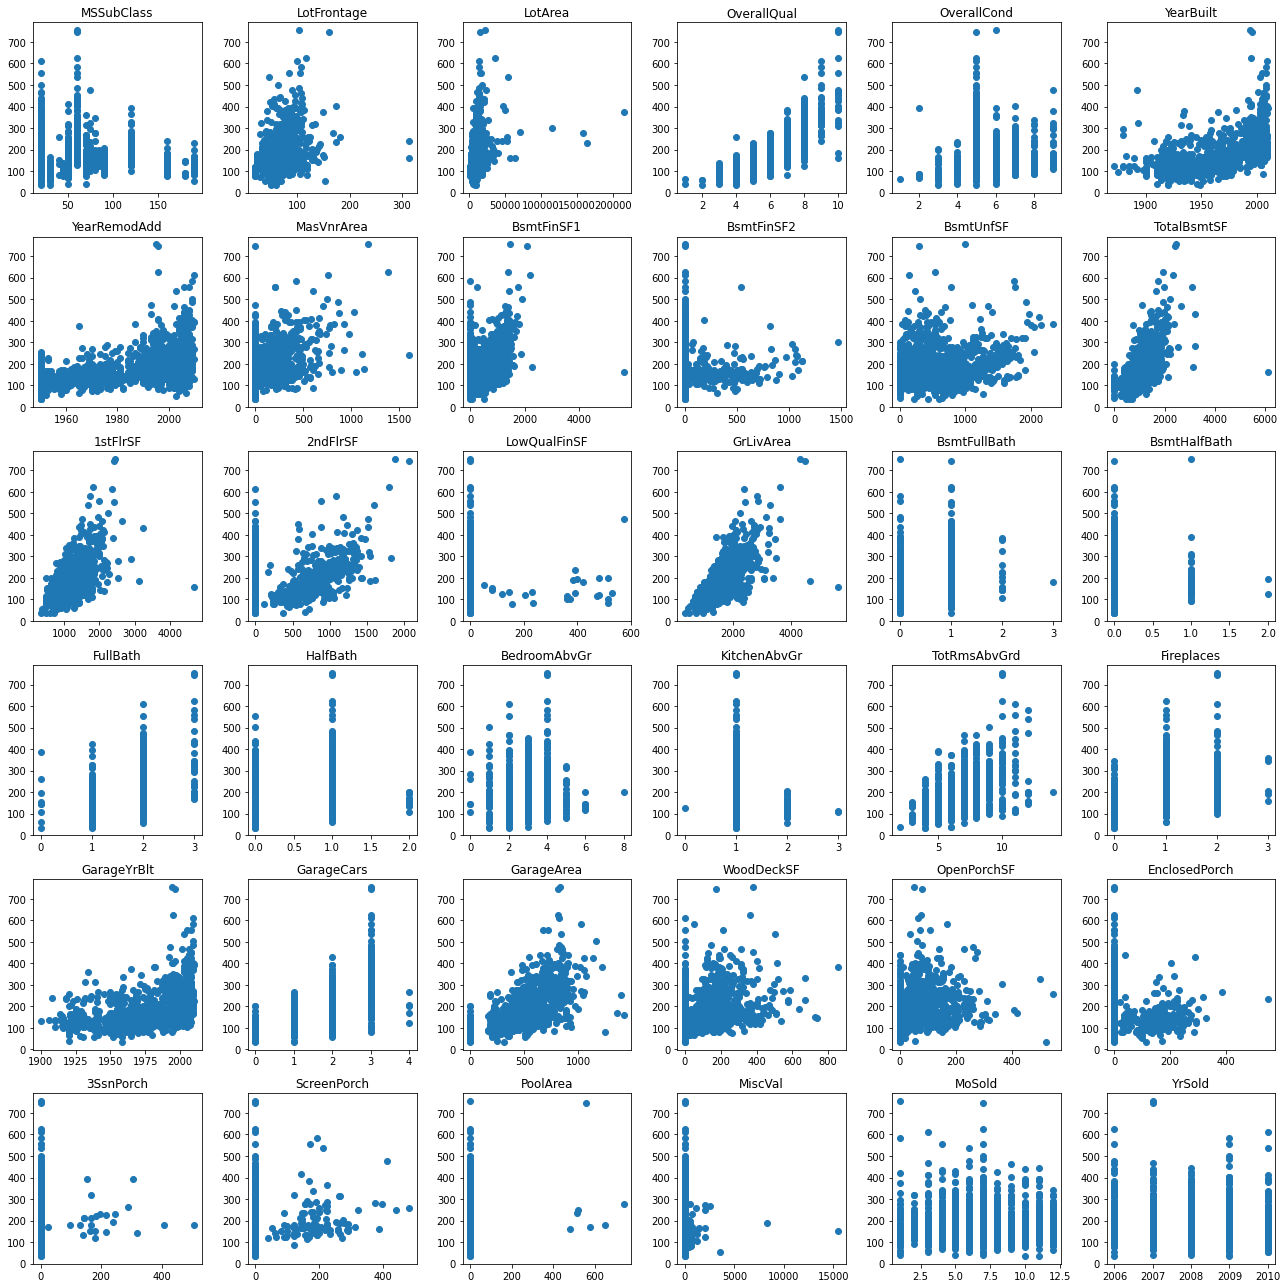

In [6]:
fig, axes = plt.subplots(6, 6, figsize=(18, 18))

for i in range(len(num_cols)):
    col_name = num_cols[i]
    row, col = i//6, i%6

    ax = axes[row, col]
    ax.scatter(df[col_name], df['SalePrice']/1000)
    ax.set_title(col_name)

plt.tight_layout()
plt.show()


In [7]:
col = 'MSSubClass'
new_col = col+'_tree'

In [8]:
df[col].isna().mean()

0.0

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df[col].to_frame(),
                                                    df['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((1022, 1), (438, 1))

# Train a Decision Tree 

In [10]:
tree_model = DecisionTreeRegressor(max_depth=3)

tree_model.fit(X_train[col].to_frame(), y_train)

DecisionTreeRegressor(max_depth=3)

In [11]:
X_train[new_col] = tree_model.predict(X_train[col].to_frame())

In [12]:
X_train.head()

,MSSubClass,MSSubClass_tree
Id,,
65,60,240141.297674
683,120,170744.233503
961,20,183289.530504
1385,50,140972.814159
1101,30,95839.361702


In [13]:
# let's explore how many end leaves the tree created 
X_train[new_col].unique()

array([240141.29767442, 170744.23350254, 183289.53050398, 140972.81415929,
        95839.36170213, 133665.78082192])

Text(0, 0.5, 'SalePrice')

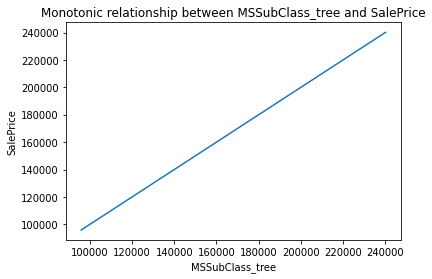

In [14]:
# monotonic relationship with target 
pd.concat([X_train, y_train], axis=1).groupby([new_col])['SalePrice'].mean().plot()
plt.title(f'Monotonic relationship between {new_col} and SalePrice')
plt.ylabel('SalePrice')

<AxesSubplot:xlabel='MSSubClass_tree'>

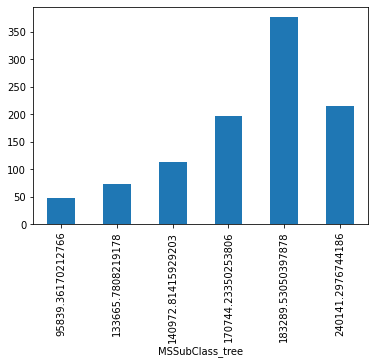

In [15]:
# numbmer of houses per bin 

X_train.groupby(new_col)[new_col].count().plot.bar()

<AxesSubplot:xlabel='MSSubClass_tree'>

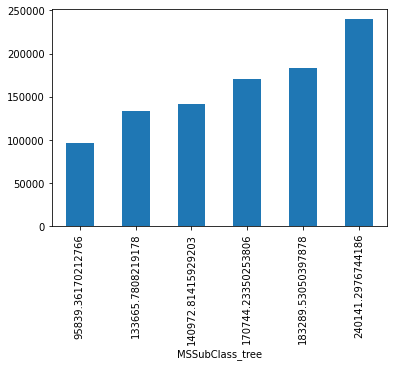

In [16]:
# median house price by bin 

X_train.groupby(new_col)[new_col].median().plot.bar()

In [17]:
# limits of buckets 

pd.concat([X_train.groupby(new_col)[col].min(), X_train.groupby(new_col)[col].max()], axis=1, keys=['min', 'max'])

,min,max
MSSubClass_tree,,
95839.361702,30,30
133665.780822,160,190
140972.814159,40,50
170744.233503,70,120
183289.530504,20,20
240141.297674,60,60


# Tree visualization

In [18]:
export_graphviz

<function sklearn.tree._export.export_graphviz(decision_tree, out_file=None, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3)>